# Proyek Analisis Data: [Bike_Sharing Dataset]
- **Nama:** Fauzan Azima
- **Email:** azzamfauzan21@gmail.com
- **ID Dicoding:** fa_zima26

## Menentukan Pertanyaan Bisnis

## Pertanyaan 1
Berdasarkan data jumlah pengguna sepeda pada tahun 2012, apakah terdapat pola tren yang dapat diidentifikasi? Jika ada, bagaimana bentuk pola tersebut? Pada bulan berapa jumlah pengguna sepeda mencapai puncaknya, serta berapa angka pastinya?



## Pertanyaan 2
Bagaimana hubungan antara kondisi cuaca dan musim dengan jumlah pengguna sepeda? Jenis kondisi cuaca dan musim apa yang mendorong jumlah pengguna sepeda mencapai puncaknya? Apakah cuaca yang lebih hangat, seperti di bulan April, Mei, dan Juni, berkontribusi terhadap peningkatan jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st  
import datetime  

## Data Wrangling

### Gathering Data

In [32]:
day_df = pd.read_csv("data/day.csv")
print(day_df.iloc[365:])
print(day_df.columns)
print(day_df.shape)   

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
365      366  2012-01-01       1   1     1        0        0           0   
366      367  2012-01-02       1   1     1        1        1           0   
367      368  2012-01-03       1   1     1        0        2           1   
368      369  2012-01-04       1   1     1        0        3           1   
369      370  2012-01-05       1   1     1        0        4           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
365    

In [31]:
hr_df = pd.read_csv("data/hour.csv")
print(day_df.iloc[365:])  
print(hr_df.columns)
print(hr_df.shape)  

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
365      366  2012-01-01       1   1     1        0        0           0   
366      367  2012-01-02       1   1     1        1        1           0   
367      368  2012-01-03       1   1     1        0        2           1   
368      369  2012-01-04       1   1     1        0        3           1   
369      370  2012-01-05       1   1     1        0        4           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
365    

### Assessing Data

#### **Evaluasi data dari day.csv & hour.csv**

>
1.   Mengecek Tipe Data
2.   Mengecek Missing Velue
3.   Mengecek Duplicate Velue
4.   Mengecek Outlier

In [33]:
#TIPE DATA
print(day_df.info())
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

Dari data yang kita tarik ditemukan bahwa terdapat sebuah kolom dengan tipe data yang tidak sesuai yaitu:
```
dtday -> object
```
menjadi
```
dtday -> datetime
```

In [34]:
#MISSING VELUE
day_df.isna().sum()
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak kita temukan satupun missing value didalam data table [day.csv & hour.csv], oleh sebab itu kita tidak harus melakukan apapun mengenai missing value.

In [35]:
#DUPLICATED VELUE
print("Data duplikasi: ", day_df.duplicated().sum())
print("Data duplikasi: ", hr_df.duplicated().sum())

Data duplikasi:  0
Data duplikasi:  0


Disimpulkan dari kode tersebut bahwa semua data value(s) yang terdapat di dalam **day.csv** dan **hour.csv** bersifat unique, artinya tidak ada satupun value yang bernilai sama dengan yang lainnya.

In [36]:
#OUTLIER VELUE
print(day_df.describe())
print(hr_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

Sejauh ini dapat kita tarik kesimpulan bahwa semua value berada pada nilai yang wajar / normal pada kedua tabel.

### Cleaning Data

Untuk memudahkan pengambilan data, akan lebih efektif jika informasi yang disajikan dalam bentuk deskripsi yang lebih jelas. Saat ini, kondisi 'musim' dan 'cuaca' di tabel hanya ditampilkan sebagai angka yang merepresentasikan keadaan sebenarnya.

Oleh karena itu, kita sebaiknya mengonversinya menjadi keterangan yang lebih deskriptif, sehingga dapat lebih mudah dipahami.

In [37]:
# Transformasi data
day_df['yr'] = day_df['yr'].map({0: '2011', 1:'2012'})
day_df['mnth'] = day_df['mnth'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], ordered=True)
day_df['season'] = day_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cuaca Cerah', 2: 'Cuaca Berawan', 3: 'Cuaca Hujan/Salju Ringan', 4: 'Cuaca Buruk'
})
day_df['dteday'] = pd.to_datetime(day_df.dteday)
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

print(day_df.iloc[365:])

     instant     dteday      season    yr      mnth holiday weekday  \
365      366 2012-01-01  Musim Semi  2012   Januari       0  Minggu   
366      367 2012-01-02  Musim Semi  2012   Januari       1   Senin   
367      368 2012-01-03  Musim Semi  2012   Januari       0  Selasa   
368      369 2012-01-04  Musim Semi  2012   Januari       0    Rabu   
369      370 2012-01-05  Musim Semi  2012   Januari       0   Kamis   
..       ...        ...         ...   ...       ...     ...     ...   
726      727 2012-12-27  Musim Semi  2012  Desember       0   Kamis   
727      728 2012-12-28  Musim Semi  2012  Desember       0   Jumat   
728      729 2012-12-29  Musim Semi  2012  Desember       0   Sabtu   
729      730 2012-12-30  Musim Semi  2012  Desember       0  Minggu   
730      731 2012-12-31  Musim Semi  2012  Desember       0   Senin   

    workingday     weathersit      temp     atemp       hum  windspeed  \
365          0    Cuaca Cerah  0.370000  0.375621  0.692500   0.192167   

Kolom-kolom yang tidak memberikan kontribusi yang signifikan terhadap analisis kita. Oleh karena itu, kita bisa mengabaikan atau menghapusnya agar data kita lebih bersih dan terorganisir, serta menghindari kebingungan yang disebabkan oleh informasi yang tidak diperlukan.

In [38]:
drop_col = ['instant', 'temp', 'atemp', 'hum', 'windspeed']
for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

print(day_df.iloc[365:])

        dteday      season    yr      mnth holiday weekday workingday  \
365 2012-01-01  Musim Semi  2012   Januari       0  Minggu          0   
366 2012-01-02  Musim Semi  2012   Januari       1   Senin          0   
367 2012-01-03  Musim Semi  2012   Januari       0  Selasa          1   
368 2012-01-04  Musim Semi  2012   Januari       0    Rabu          1   
369 2012-01-05  Musim Semi  2012   Januari       0   Kamis          1   
..         ...         ...   ...       ...     ...     ...        ...   
726 2012-12-27  Musim Semi  2012  Desember       0   Kamis          1   
727 2012-12-28  Musim Semi  2012  Desember       0   Jumat          1   
728 2012-12-29  Musim Semi  2012  Desember       0   Sabtu          0   
729 2012-12-30  Musim Semi  2012  Desember       0  Minggu          0   
730 2012-12-31  Musim Semi  2012  Desember       0   Senin          1   

        weathersit  casual  registered   cnt  
365    Cuaca Cerah     686        1608  2294  
366    Cuaca Cerah     244   

In [39]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB
None


## Exploratory Data Analysis (EDA)

### Explore kebutuhan Trend dalam skala waktu 12 Bulan di tahun 2012

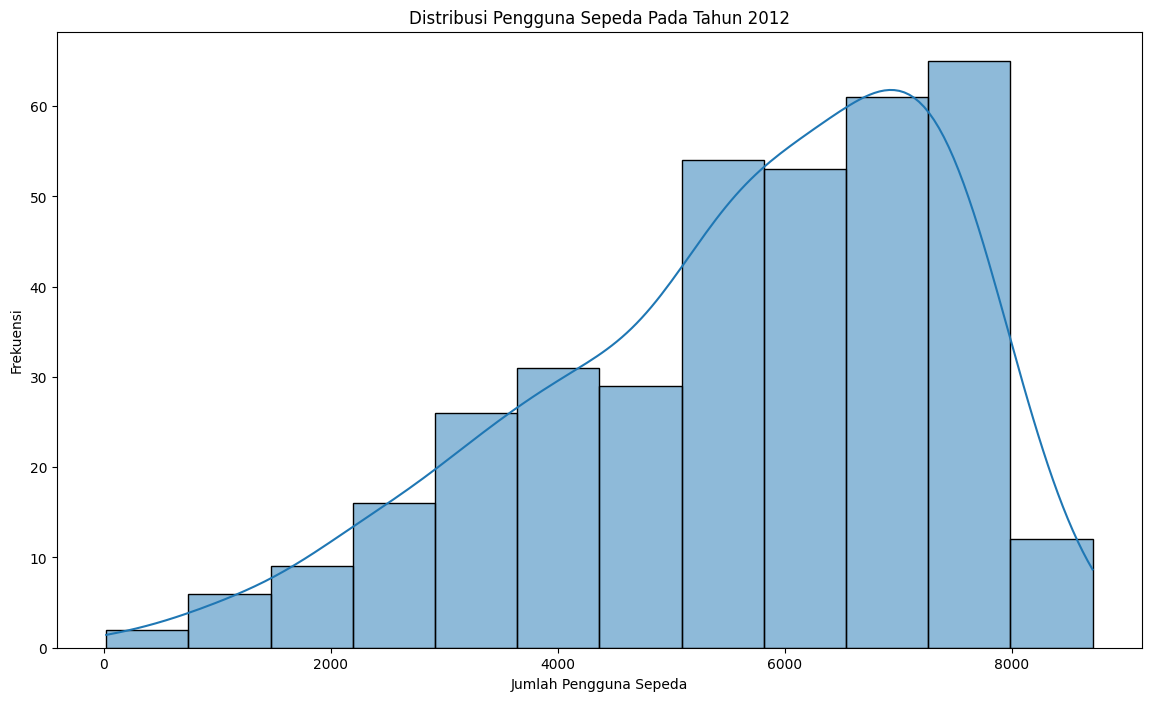

In [40]:
#Menganalisis Distribusi Data
day_df_filtered = day_df.iloc[367:]
plt.figure(figsize=(14,8))
sns.histplot(day_df_filtered['cnt'], kde=True)
plt.title('Distribusi Pengguna Sepeda Pada Tahun 2012')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.ylabel('Frekuensi')
plt.show()

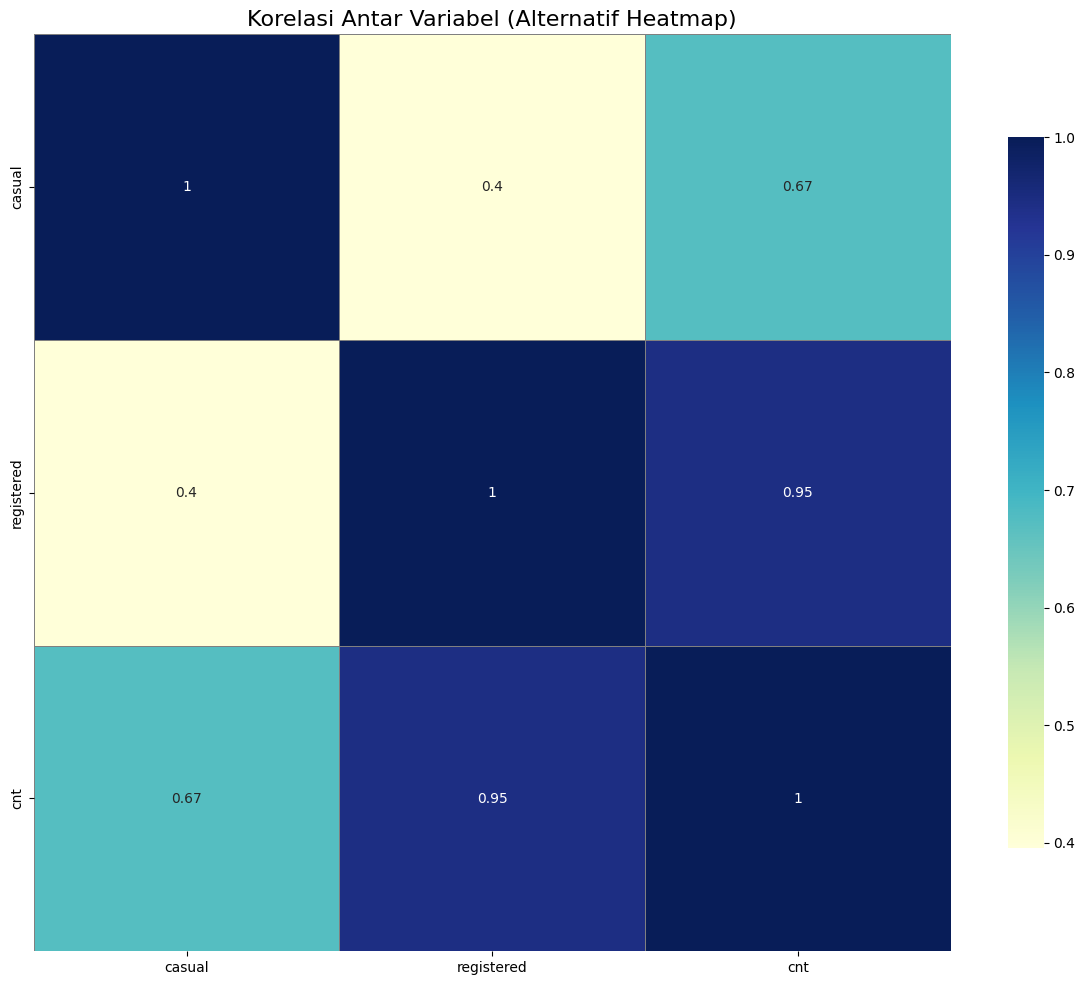

In [42]:
# Menghitung korelasi antar variabel numerik dengan cara yang sedikit berbeda
numerical_columns = day_df.select_dtypes(include=['number']).columns
corr_matrix = day_df[numerical_columns].corr()

# Mengatur ukuran plot dan mengganti gaya heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='YlGnBu', 
    square=True, 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'shrink': 0.75}
)

# Memberikan label dan judul pada plot
plt.title('Korelasi Antar Variabel (Alternatif Heatmap)', fontsize=16)
plt.tight_layout()
plt.show()


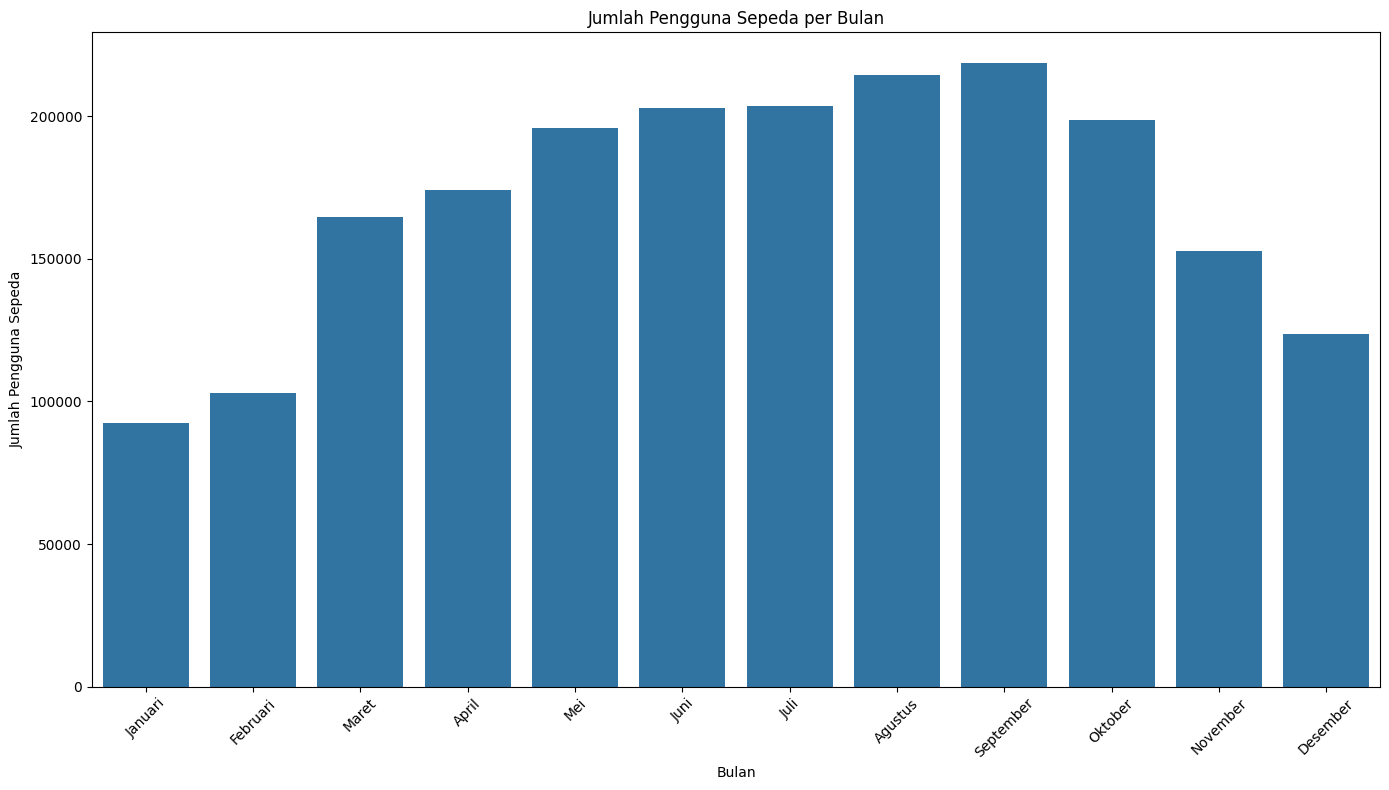

Jumlah pengguna sepeda per bulan:
- Bulan Januari: 92499 pengguna sepeda
- Bulan Februari: 103137 pengguna sepeda
- Bulan Maret: 164875 pengguna sepeda
- Bulan April: 174224 pengguna sepeda
- Bulan Mei: 195865 pengguna sepeda
- Bulan Juni: 202830 pengguna sepeda
- Bulan Juli: 203607 pengguna sepeda
- Bulan Agustus: 214503 pengguna sepeda
- Bulan September: 218573 pengguna sepeda
- Bulan Oktober: 198841 pengguna sepeda
- Bulan November: 152664 pengguna sepeda
- Bulan Desember: 123713 pengguna sepeda


In [43]:
# Membuat grafik jumlah pengguna sepeda per bulan
day_df_filtered = day_df.iloc[367:]
monthly_counts = day_df_filtered.groupby('mnth', observed=False)['cnt'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='mnth', y='cnt', data=monthly_counts)
plt.title('Jumlah Pengguna Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan jumlah pengguna sepeda per bulan
print("Jumlah pengguna sepeda per bulan:")
for index, row in monthly_counts.iterrows():
    print(f"- Bulan {row['mnth']}: {row['cnt']} pengguna sepeda")

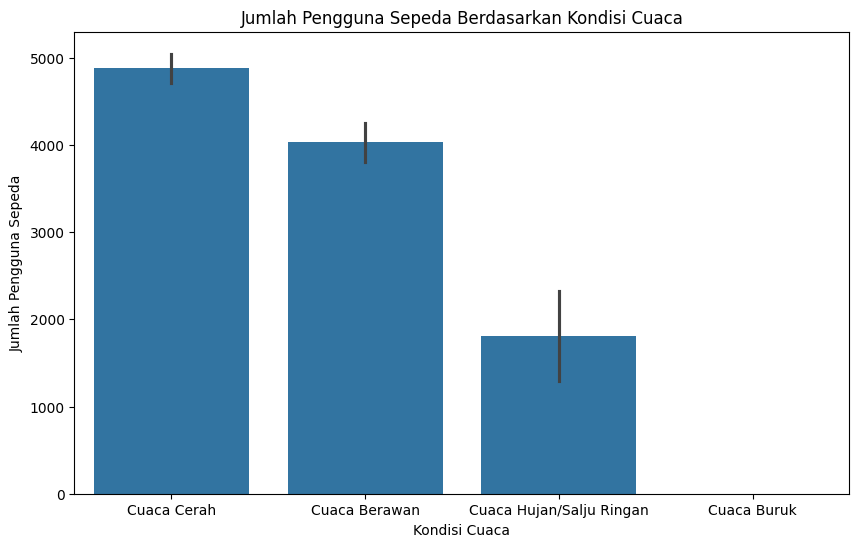

weathersit
Cuaca Cerah                 463
Cuaca Berawan               247
Cuaca Hujan/Salju Ringan     21
Name: count, dtype: int64


In [44]:
# Membuat grafik jumlah pengguna sepeda berdasarkan kondisi cuaca
order = ['Cuaca Cerah', 'Cuaca Berawan', 'Cuaca Hujan/Salju Ringan', 'Cuaca Buruk']
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=day_df, order=order)
plt.title('Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()
print(day_df['weathersit'].value_counts())

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berdasarkan data yang tersedia, bagaimana pola tren jumlah pengguna sepeda sepanjang tahun 2012? Kapan jumlah pengguna mencapai puncaknya, dan bagaimana pola perubahan jumlah pengguna dari bulan ke bulan?

C:\Users\whand\AppData\Local\Temp\ipykernel_31604\774760058.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df_filtered.groupby("mnth").agg({


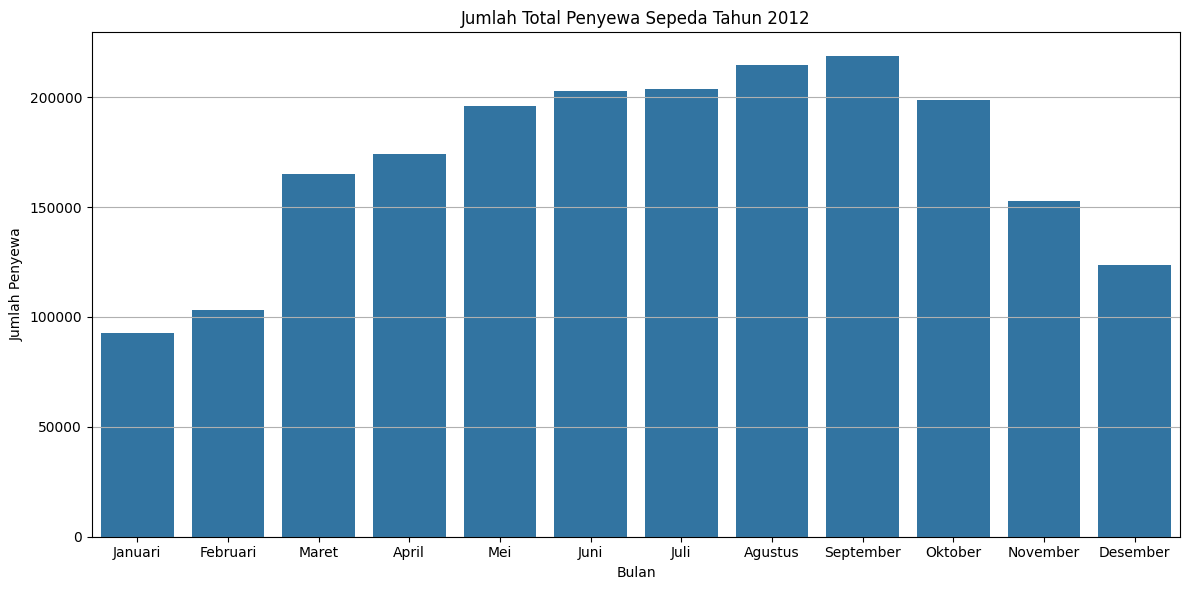

Jumlah pengguna tertinggi terjadi pada bulan September dengan total 218573 penyewa sepeda.


In [45]:
# Kelompokkan data berdasarkan bulan dan hitung jumlah pengguna
day_df_filtered = day_df.iloc[367:]
monthly_counts = day_df_filtered.groupby("mnth").agg({
    "cnt": "sum"
}).reset_index()

# Plot data sebagai grafik bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
)
plt.title("Jumlah Total Penyewa Sepeda Tahun 2012")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.grid(axis='y')  # Tambahkan grid horizontal untuk mempermudah pembacaan
plt.tight_layout()
plt.show()

# Temukan bulan dengan jumlah pengguna tertinggi
max_users = monthly_counts.loc[monthly_counts['cnt'].idxmax()]
print(f"Jumlah pengguna tertinggi terjadi pada bulan {max_users['mnth']} "
      f"dengan total {max_users['cnt']} penyewa sepeda.")

***Pola Tren:***

Dari grafik yang ada, kita dapat mengamati perubahan jumlah penyewa sepeda sepanjang 12 bulan di tahun 2012:

- Tren Kenaikan: Terdapat kecenderungan yang jelas menuju peningkatan jumlah penyewa, dimulai dari Februari hingga September 2012. Di bulan Januari, jumlah penyewa masih terbilang rendah, sekitar 92.499  pengguna. Namun, pada bulan Maret, terjadi lonjakan signifikan yang membawa jumlah penyewa meningkat menjadi sekitar 164.875  pengguna. Kenaikan ini terus berlanjut hingga mencapai titik tertinggi pada bulan September.

- Puncak Pengguna: Bulan September 2012 mencatat jumlah penyewa sepeda yang tertinggi, dengan total lebih dari 218.573  pengguna.

### Pertanyaan 2:

Bagaimana hubungan antara kondisi cuaca dan musim dengan jumlah pengguna sepeda? Apakah cuaca yang lebih hangat, seperti di bulan Februari hingga September, berpengaruh positif terhadap minat masyarakat untuk bersepeda? Jika iya, bagaimana pola tersebut terlihat dalam data?

C:\Users\whand\AppData\Local\Temp\ipykernel_31604\755299918.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather = day_df.groupby(['season', 'weathersit']).agg({


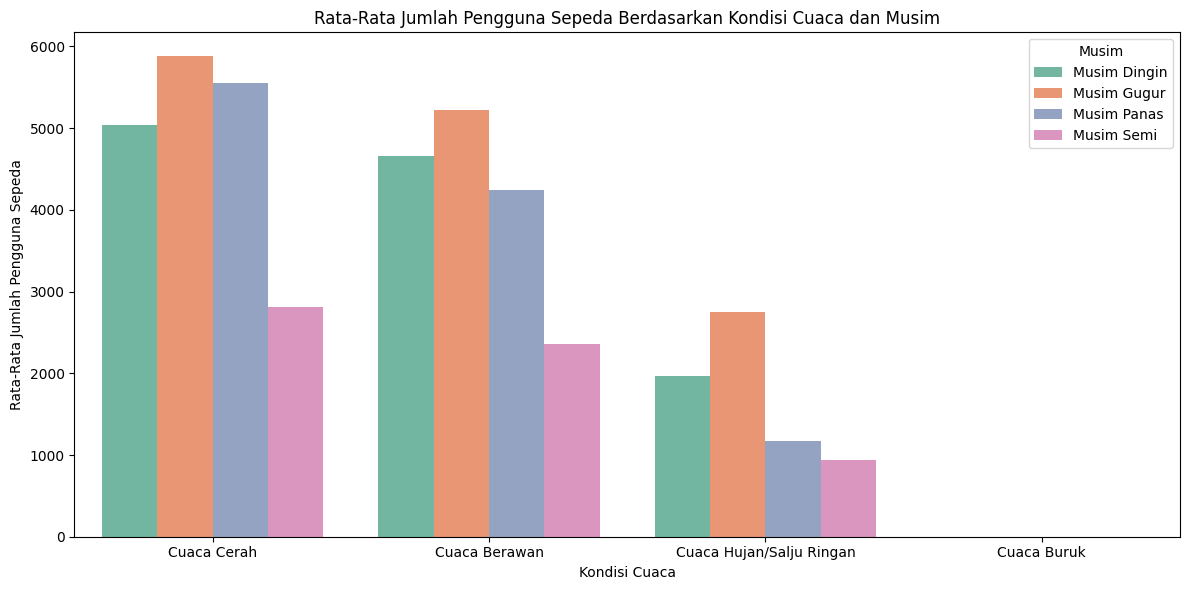

Kombinasi musim dan cuaca dengan rata-rata pengguna tertinggi adalah:
Musim Gugur pada Kondisi Cuaca Cerah dengan rata-rata pengguna 5878.26.

Musim Semi:
  - Cuaca Cerah: 2811.14 pengguna rata-rata
  - Cuaca Berawan: 2357.17 pengguna rata-rata
  - Cuaca Hujan/Salju Ringan: 934.75 pengguna rata-rata
  - Cuaca Buruk: Data tidak tersedia

Musim Panas:
  - Cuaca Cerah: 5548.55 pengguna rata-rata
  - Cuaca Berawan: 4236.71 pengguna rata-rata
  - Cuaca Hujan/Salju Ringan: 1169.00 pengguna rata-rata
  - Cuaca Buruk: Data tidak tersedia

Musim Gugur:
  - Cuaca Cerah: 5878.26 pengguna rata-rata
  - Cuaca Berawan: 5222.48 pengguna rata-rata
  - Cuaca Hujan/Salju Ringan: 2751.75 pengguna rata-rata
  - Cuaca Buruk: Data tidak tersedia

Musim Dingin:
  - Cuaca Cerah: 5043.56 pengguna rata-rata
  - Cuaca Berawan: 4654.00 pengguna rata-rata
  - Cuaca Hujan/Salju Ringan: 1961.60 pengguna rata-rata
  - Cuaca Buruk: Data tidak tersedia


C:\Users\whand\AppData\Local\Temp\ipykernel_31604\755299918.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather_avg = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()


In [46]:
# Mengelompokkan data berdasarkan musim dan kondisi cuaca, lalu menghitung rata-rata pengguna
season_weather = day_df.groupby(['season', 'weathersit']).agg({
    'cnt': 'mean'
}).reset_index()

# Plot grafik bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=season_weather,
    x='weathersit',
    y='cnt',
    hue='season',
    palette='Set2',
    order=['Cuaca Cerah', 'Cuaca Berawan', 'Cuaca Hujan/Salju Ringan', 'Cuaca Buruk']  # Menambahkan urutan cuaca
)

plt.title('Rata-Rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca dan Musim')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Pengguna Sepeda')
plt.legend(title='Musim', loc='upper right')
plt.tight_layout()
plt.show()

# Temukan kombinasi musim dan kondisi cuaca dengan jumlah pengguna tertinggi
max_usage = season_weather.loc[season_weather['cnt'].idxmax()]
print(f"Kombinasi musim dan cuaca dengan rata-rata pengguna tertinggi adalah:\n"
      f"{max_usage['season']} pada Kondisi {max_usage['weathersit']} "
      f"dengan rata-rata pengguna {max_usage['cnt']:.2f}.")

# Mengelompokkan data berdasarkan musim dan kondisi cuaca, lalu menghitung rata-rata pengguna
season_weather_avg = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

# Menyusun hasil berdasarkan musim
musim = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
cuaca = ['Cuaca Cerah', 'Cuaca Berawan', 'Cuaca Hujan/Salju Ringan', 'Cuaca Buruk']

# Menampilkan hasil dengan format yang lebih terstruktur
for m in musim:
    print(f"\n{m}:")
    for c in cuaca:
        nilai = season_weather_avg[
            (season_weather_avg['season'] == m) & (season_weather_avg['weathersit'] == c)
        ]['cnt']
        
        if not nilai.empty:
            print(f"  - {c}: {nilai.values[0]:.2f} pengguna rata-rata")
        else:
            print(f"  - {c}: Data tidak tersedia")


**Pola Tren:**

Berdasarkan grafik dan keterangan yang disajikan, berikut adalah analisis yang dapat  disampaikan:

- Hubungan Cuaca dan Musim dengan Jumlah Pengguna:
Kombinasi antara musim dan cuaca menunjukkan bahwa Musim Gugur dengan kondisi cerah mencatatkan jumlah pengguna tertinggi. Di semua musim, cuaca cerah cenderung menghasilkan angka pengguna yang lebih tinggi dibandingkan dengan kondisi berawan atau saat hujan/salju ringan.

- Pola Kenaikan Berdasarkan Cuaca dan Musim:
Bulan Februari hingga September menunjukkan tren peningkatan jumlah pengguna sepeda. Hal ini mungkin berkaitan dengan datangnya musim yang lebih hangat, yaitu Musim Panas atau Musim Semi, yang sering kali diiringi oleh cuaca cerah. Kondisi cuaca yang baik memberikan kenyamanan serta motivasi lebih bagi masyarakat untuk beraktivitas di luar ruangan, seperti bersepeda.

## Conclusion

#- **Conclution pertanyaan 1**

1. Apakah terdapat pola tren yang dapat diidentifikasi?
Ya, terdapat pola tren yang jelas dalam jumlah pengguna sepeda. Data menunjukkan peningkatan yang konsisten selama dua belas bulan pada tahun 2012.

2. Seperti apa pola tersebut?
Pola ini menunjukkan lonjakan signifikan dari bulan Maret hingga September, diikuti oleh peningkatan yang lebih stabil dari bulan Februari hingga mencapai puncaknya pada bulan September.

3. Pada tahun dan bulan apa jumlah pengguna mencapai titik tertingginya?
Jumlah pengguna mencapai titik tertinggi pada bulan September 2012, dengan total lebih dari 218.573  pengguna.

#- **Conclution pertanyaan 2**

1. Apakah peningkatan jumlah pengguna pada bulan-bulan yang lebih hangat menunjukkan bahwa cuaca baik mempengaruhi minat masyarakat untuk bersepeda?
Ya, peningkatan jumlah pengguna pada bulan Februari hingga September menunjukkan bahwa cuaca yang baik berpengaruh positif terhadap minat masyarakat untuk bersepeda.

2. Jenis kondisi cuaca dan musim apa yang mendorong jumlah pengguna sepeda mencapai puncaknya?
Kondisi cuaca cerah dan musim semi menjadi faktor utama yang mendorong jumlah pengguna sepeda meningkat. Analisis grafik menunjukkan bahwa rata-rata jumlah pengguna tertinggi tercatat pada hari-hari dengan kondisi cuaca cerah dibandingkan dengan hari berawan atau hujan.

#- **Rekomendasi untuk Meningkatkan Sistem Penyewaan Sepeda**

Untuk mengoptimalkan sistem penyewaan sepeda, langkah-langkah berikut dapat diterapkan berdasarkan tren penggunaan yang telah dianalisis:

1. Optimalisasi Operasional Berdasarkan Tren Musiman

- Meningkatkan jumlah sepeda yang tersedia selama periode puncak (April – Juni) guna mengakomodasi lonjakan permintaan.
- Melakukan perawatan dan inspeksi lebih intensif sebelum memasuki musim dengan permintaan tinggi untuk memastikan sepeda dalam kondisi optimal.
- Menyesuaikan jam operasional dengan pola penggunaan, seperti memperpanjang waktu layanan pada bulan-bulan dengan pengguna terbanyak.

2. Peningkatan Kepuasan Pelanggan

- Menyediakan informasi cuaca real-time melalui aplikasi penyewaan sepeda agar pengguna dapat merencanakan perjalanan dengan lebih baik.
- Menawarkan program loyalitas atau diskon khusus pada hari-hari cerah untuk mendorong lebih banyak penyewaan.
- Menyediakan opsi pembayaran yang lebih fleksibel, seperti paket langganan bulanan atau mingguan bagi pelanggan setia.
- Menambah fasilitas pendukung seperti tempat parkir sepeda yang lebih nyaman dan aman di titik-titik strategis.

3. Strategi Peningkatan Pendapatan dan Efisiensi

- Menggunakan strategi harga dinamis dengan penyesuaian tarif berdasarkan musim dan tingkat permintaan. Misalnya, menawarkan harga lebih rendah di musim dingin untuk menjaga tingkat penyewaan tetap stabil.
- Memperluas jaringan stasiun penyewaan sepeda di lokasi dengan mobilitas tinggi, terutama selama musim semi dan awal musim panas.
- Berkolaborasi dengan pihak ketiga, seperti restoran, tempat wisata, atau event organizer, untuk menyediakan paket bundling yang menarik bagi pengguna sepeda.

Dengan menerapkan rekomendasi ini, sistem penyewaan sepeda dapat beroperasi lebih efisien, meningkatkan kepuasan pelanggan, serta memaksimalkan pendapatan berdasarkan pola tren penggunaan yang telah diidentifikasi.


